In [1]:
#Non-negative data

#Which of the following 2-dimensional arrays are examples of non-negative data?

#1. A tf-idf word-frequency array.
#2. An array daily stock market price movements (up and down), where each row represents a company.
#3. An array where rows are customers, columns are products and entries are 0 or 1, indicating whether a customer has
#purchased a product.

#Possible Answers

#1 only

#2 and 3

#1 and 3*

In [2]:
#NOTE: Stock prices can go down as well as up, so an array of daily stock market price movements is not an example of
#non-negative data.

In [3]:
#NMF applied to Wikipedia articles

import pandas as pd
from scipy.sparse import csr_matrix
df = pd.read_csv('datasets/wikipedia_articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())

#In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time
#using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and
#transform the articles. In the next exercise, you'll explore the result.

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.57]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.49]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.36 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.38 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.47 0.   0.   0.  ]
 [0.   0.01 0.02 0.52 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.44 0.   0.  ]
 [0.   0.   0.   0.5  0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.58 0.   0.  ]
 [0.   0.   0.   0.53 0.01 0.01]
 [0.   0.4

D:\Users\ASUS\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [4]:
#NOTE: Let's explore the meaning of these features in the next exercise!

In [5]:
#NMF features of the Wikipedia articles

titles = list(df.columns)

#Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been
#pre-loaded, so the array nmf_features is available. Also available is a list titles giving the title of each Wikipedia
#article.

#When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means
#that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components
#represent topics (for instance, acting!).

# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'], '\n')

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575595
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64 

0    0.000000
1    0.005601
2    0.000000
3    0.422295
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [6]:
#NOTE: Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are
#reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics
#(for instance, acting!).

In [7]:
#NMF reconstructs samples

#In this exercise, you'll check your understanding of how NMF reconstructs samples from its components using the NMF
#feature values. On the right are the components of an NMF model. If the NMF feature values of a sample are [2, 1], then
#which of the following is most likely to represent the original sample? A pen and paper will help here! You have to apply
#the same technique Ben used in the video to reconstruct the sample [0.1203 0.1764 0.3195 0.141].

import numpy as np
nmf_components = np.array([[1., 0.5, 0.], [0.2, 0.1, 2.1]])
nmf_features = np.array([[2], [1]])
rec_sample = np.sum(nmf_features * nmf_components, axis=0)
rec_sample

array([2.2, 1.1, 2.1])

In [8]:
#Possible Answers

#[2.2, 1.1, 2.1].*

#[0.5, 1.6, 3.1].

#[-4.0, 1.0, -2.0].

In [9]:
#NMF learns topics of documents

with open('datasets/wikipedia_articles/wikipedia-vocabulary-utf8.txt', 'r') as f:
    words = f.read()
words = words.split('\n')

#In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF
#features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier
#using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors
#Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

#The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the
#word-frequency array.

#After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have
#in common!

# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape, '\n')

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125) 

film       0.628003
award      0.253182
starred    0.245333
role       0.211493
actress    0.186435
Name: 3, dtype: float64


In [10]:
#NOTE: Take a moment to recognise the topics that the articles about Anne Hathaway and Denzel Washington have in common!

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] 

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]] 



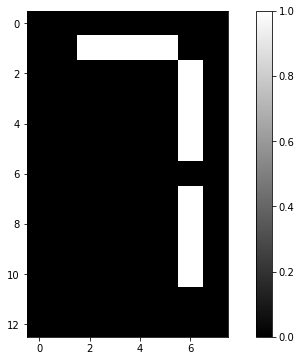

In [11]:
#Explore the LED digits dataset

import pandas as pd
df_digits = pd.read_csv('datasets/lcd-digits.csv', header=None)
samples = df_digits.values

#In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly,
#explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where
#each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

# Import pyplot
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))

# Select the 0th row: digit
digit = samples[0, :]

# Print digit
print(digit, '\n')

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap, '\n')

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [12]:
#NOTE: You'll explore this dataset further in the next exercise and see for yourself how NMF can learn the parts of images.

D:\Users\ASUS\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


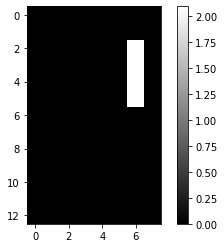

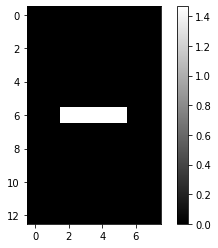

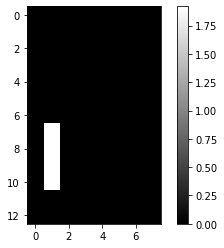

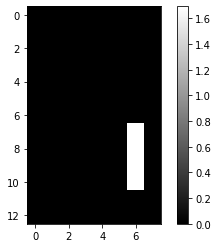

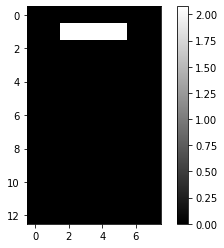

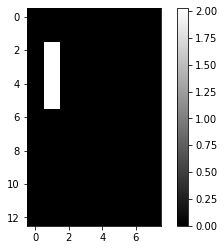

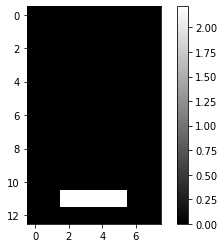

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37562716e-16]


In [13]:
#NMF learns the parts of images

#Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array
#samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

#After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the
#components!

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0, :]

# Print digit_features
print(digit_features)

In [14]:
#NOTE: Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

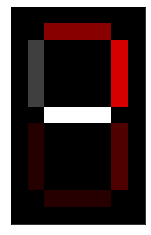

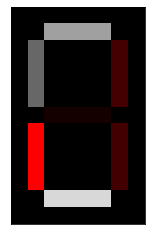

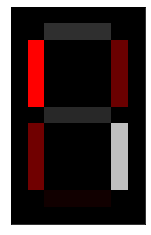

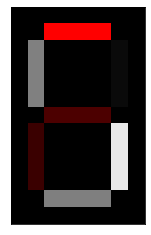

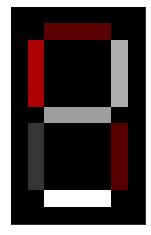

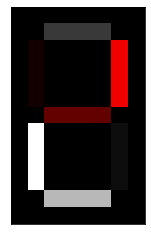

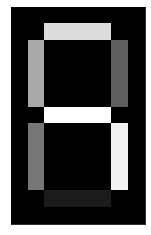

In [15]:
#PCA doesn't learn parts

def show_as_image(vector):
    """
    Given a 1d vector representing an image, display that image in 
    black and white.  If there are negative values, then use red for 
    that pixel.
    """
    bitmap = vector.reshape((13, 8))  # make a square array
    bitmap /= np.abs(vector).max()  # normalise
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

#Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents)
#or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to
#the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available
#is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

#After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [16]:
#NOTE: Notice that the components of PCA do not represent meaningful parts of images of LED digits!

In [17]:
#Which articles are similar to 'Cristiano Ronaldo'?

import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF
df = pd.read_csv('datasets/wikipedia_articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)
model = NMF(n_components=6)
model.fit(articles)
nmf_features = model.transform(articles)

#In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your
#NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer
#Cristiano Ronaldo. The NMF features you obtained earlier are available as nmf_features, while titles is a list of the
#article titles.

# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


D:\Users\ASUS\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [18]:
#NOTE: Although you may need to know a little about football (or soccer, depending on where you're from!) to be able to
#evaluate for yourself the quality of the computed similarities!

In [19]:
#Recommend musical artists part I

import pandas as pd
from scipy.sparse import csr_matrix
df_artists1 = pd.read_csv('datasets/musical_artists/scrobbler-small-sample.csv')
df_artists2 = pd.pivot_table(df_artists1, values='playcount', index='artist_offset', columns='user_offset')
df_artists2.replace(np.nan, 0, inplace=True)
artists = csr_matrix(df_artists2)

#In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given
#a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number
#of times each artist was listened to by each user.

#In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline,
#MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different
#artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

D:\Users\ASUS\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [20]:
#NOTE: Now that you've computed the normalized NMF features, you'll use them in the next exercise to recommend musical
#artists!

In [21]:
#Recommend musical artists part II

df_artist_names = pd.read_csv('datasets/musical_artists/artists.csv', header=None)
artist_names = df_artist_names[0].to_list()

#Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from
#the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has
#been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists
#are available as the list artist_names.

# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.958446
Leonard Cohen        0.915788
Van Morrison         0.873372
Bob Dylan            0.865014
dtype: float64
